In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import random

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
num_epoch = 30
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist

In [ ]:
x_train, x_test = x_train /255., x_test/255.

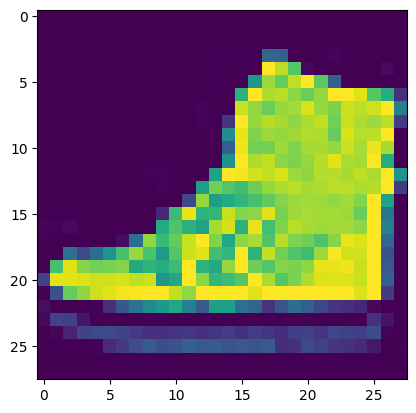

In [ ]:
df2 = random.randint(0, len(y_test)) #...........
plt.imshow(x_test[df2, :])
plt.show()

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=num_epoch, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6972 - accuracy: 0.7677 - val_loss: 0.5758 - val_accuracy: 0.7880
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4802 - accuracy: 0.8323 - val_loss: 0.5035 - val_accuracy: 0.8261
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4367 - accuracy: 0.8475 - val_loss: 0.4399 - val_accuracy: 0.8459
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4102 - accuracy: 0.8559 - val_loss: 0.4305 - val_accuracy: 0.8475
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3912 - accuracy: 0.8624 - val_loss: 0.4276 - val_accuracy: 0.8442
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3742 - accuracy: 0.8668 - val_loss: 0.4055 - val_accuracy: 0.8571
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3611 - accuracy: 0.8723 - val_loss: 0.4128 - val_accuracy:

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3805 - accuracy: 0.8626


[0.38053861260414124, 0.8626000285148621]

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 2s 6ms/step


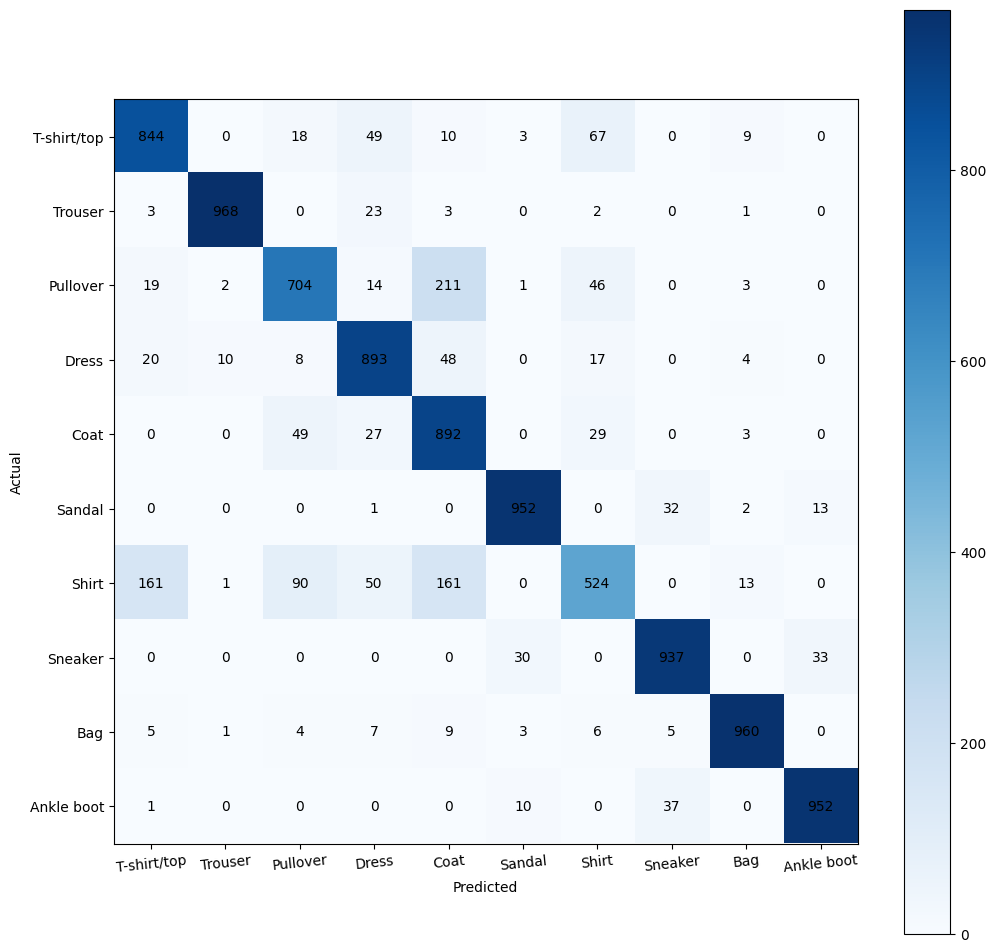

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred= y_pred)
plt.figure(figsize=(12,12))
plt.imshow(cm, interpolation='none', cmap='Blues')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=6)
plt.yticks(tick_marks, class_names)

for(i, j), z in np.ndenumerate(cm):
  plt.text(j, i, z, ha='center', va='center')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()